In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from nilearn import plotting

# Plot method

In [33]:
def plot_z_slices(img, n_rows, n_cols, title = None, output_file = None):
    all_coords = plotting.find_cut_slices(
        img, direction = "z", n_cuts = n_rows*n_cols)
    ax_size = 3.0
    margin = 0.05
    fig, all_axes = plt.subplots(n_rows,n_cols,figsize=(n_rows * ax_size, n_cols * ax_size),
                                 gridspec_kw={"hspace": margin, "wspace": margin},)
    left_right = True
    for coord, ax in zip(all_coords, all_axes.ravel()):
        display = plotting.plot_stat_map(img, cut_coords=[coord], display_mode="z", axes=ax, annotate=False)
        display.annotate(left_right=left_right)
        # only show L R on the first (top left) axis
        left_right = False
        if title:
            plt.suptitle(title, fontsize=15)
        if output_file:
            plt.savefig(output_file)

# Nilearn Decoder

In [61]:
## Loading the decoder
decoderdir = 'logs/decoder_CV_per_run/train_decoder.sav'
decoder = pickle.load(open(decoderdir, 'rb'))

/opt/anaconda3/envs/MVAP/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [64]:
## Dictionnary to dataFrame for visulaization
df = pd.DataFrame.from_dict(decoder.cv_scores_)
df

caught     chase  checkpoint  close_enemy  protected_by_wall    vc_hit
0  0.875385  0.777343    0.928197     0.907205           0.808330  0.800500
1  0.943773  0.874636    0.984423     0.967930           0.848147  0.890046
2  0.932695  0.878800    0.978676     0.922199           0.836235  0.846397
3  0.868971  0.848980    0.984506     0.929363           0.813994  0.943190
4  0.915119  0.864890    0.991920     0.959434           0.828571  0.885964

/opt/anaconda3/envs/MVAP/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Mean Validation Accuracy across events : 


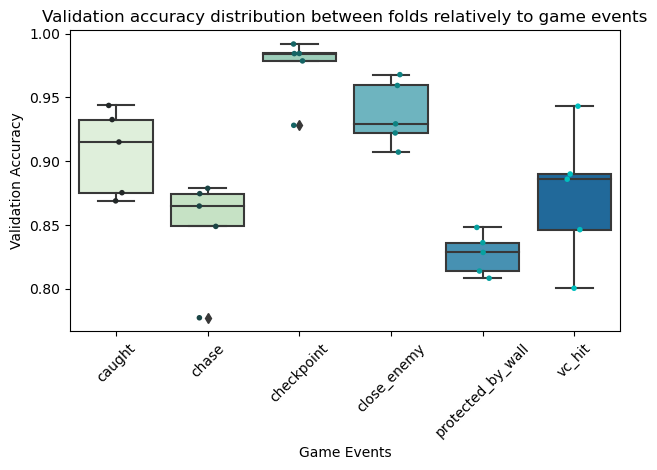

In [68]:
#Boxplot 
palette = sns.color_palette("GnBu")

sns.boxplot(df,palette = palette).set( xlabel='Game Events', ylabel='Validation Accuracy')
sns.stripplot(data = df,  palette='dark:c',size = 4)

print('Mean Validation Accuracy across events : ', )

plt.xticks(rotation=45)
plt.title ('Validation accuracy distribution between folds relatively to game events')
plt.tight_layout()
plt.savefig('Decoder_Mean_accurac.png')
plt.show()


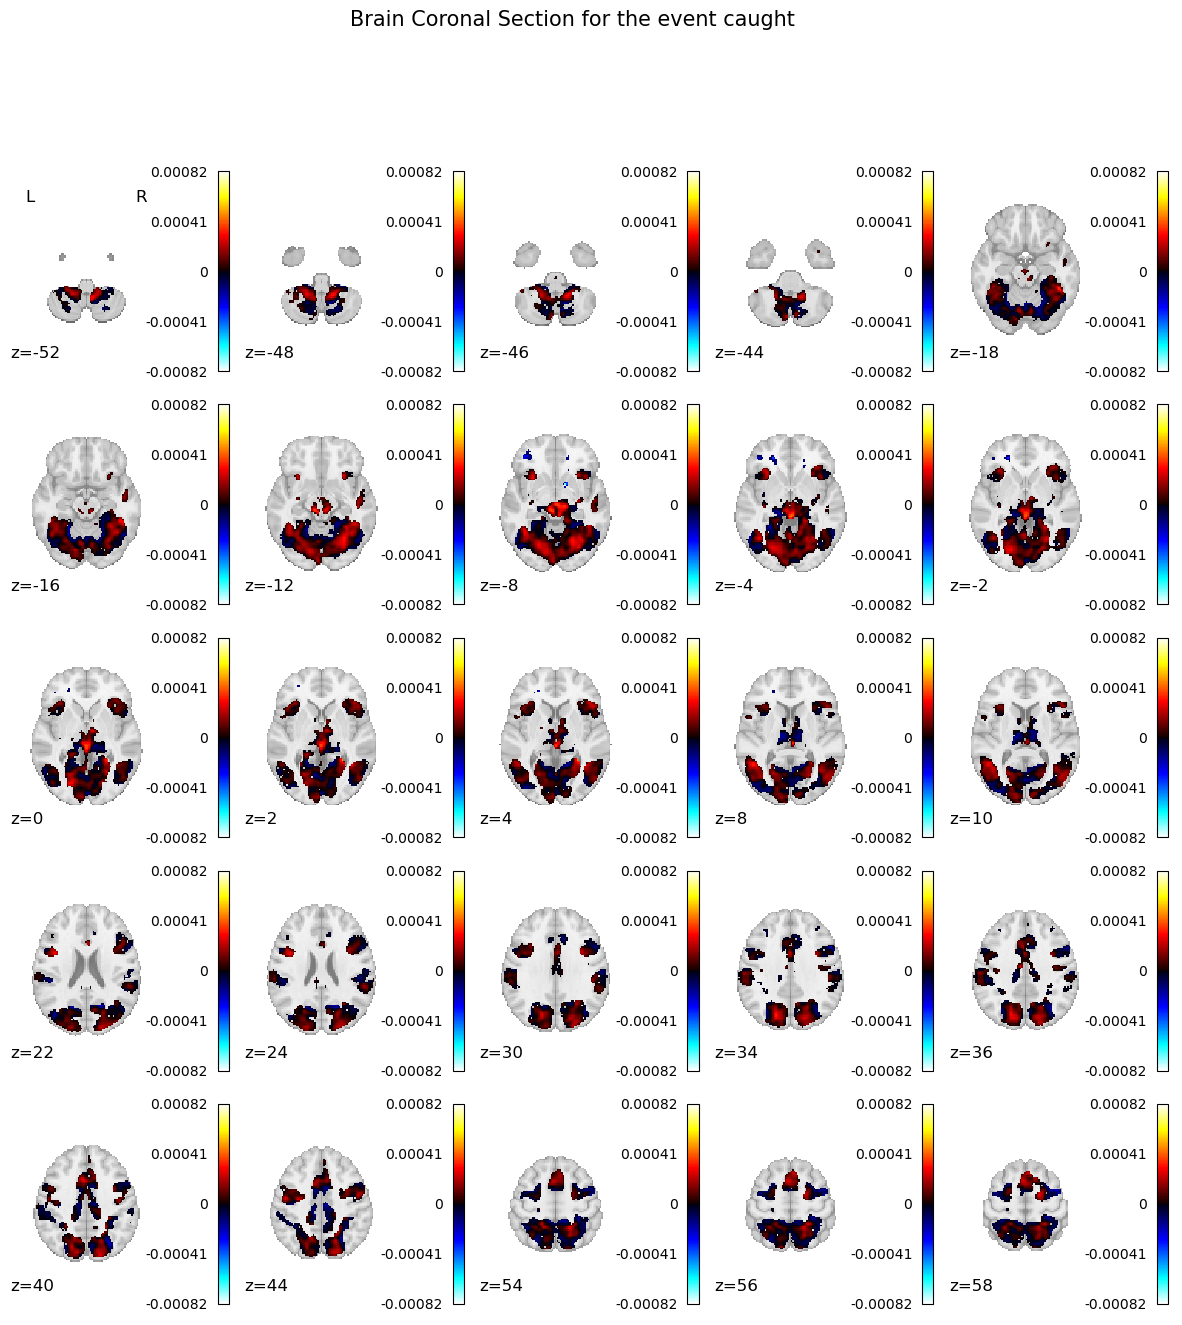

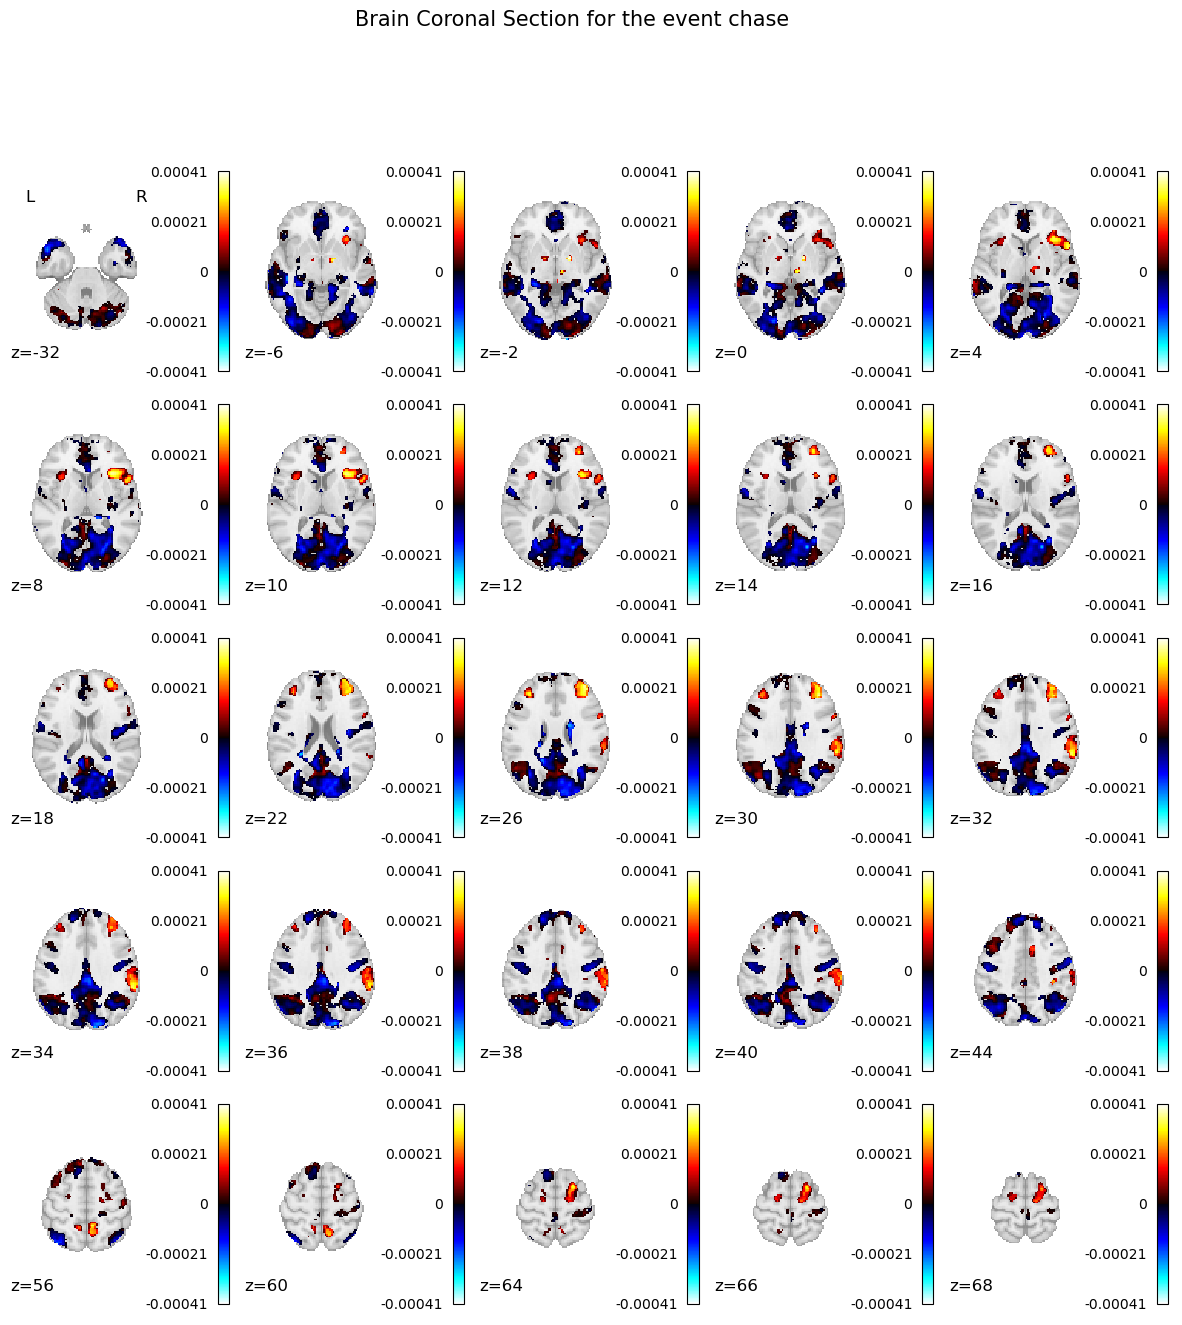

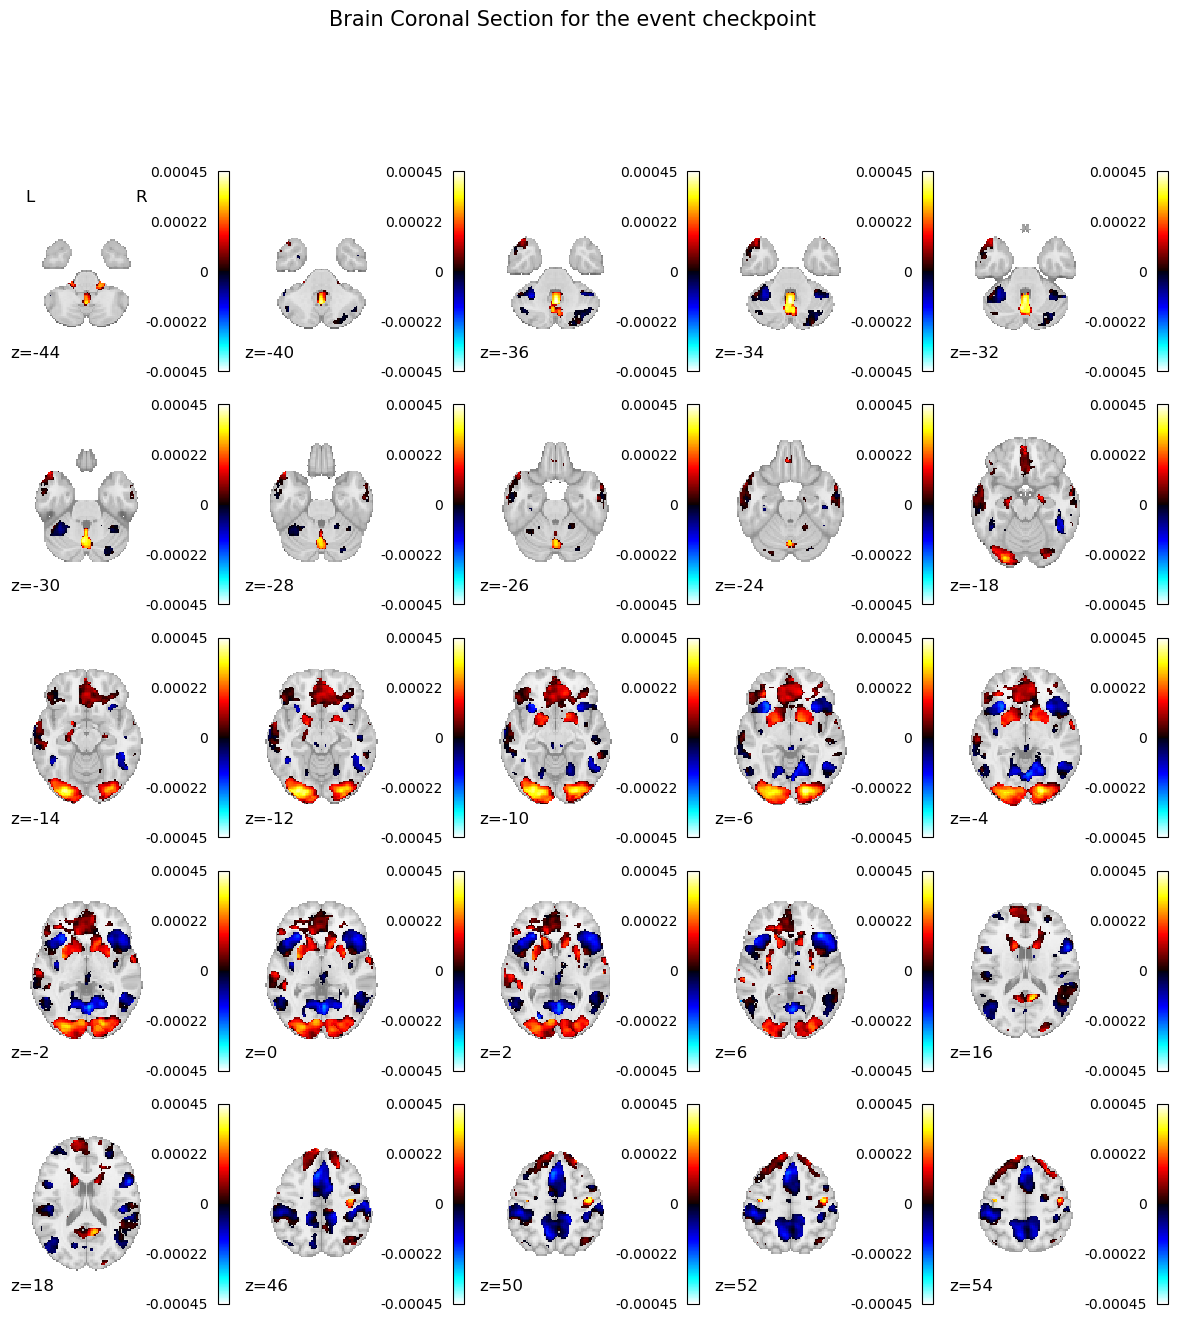

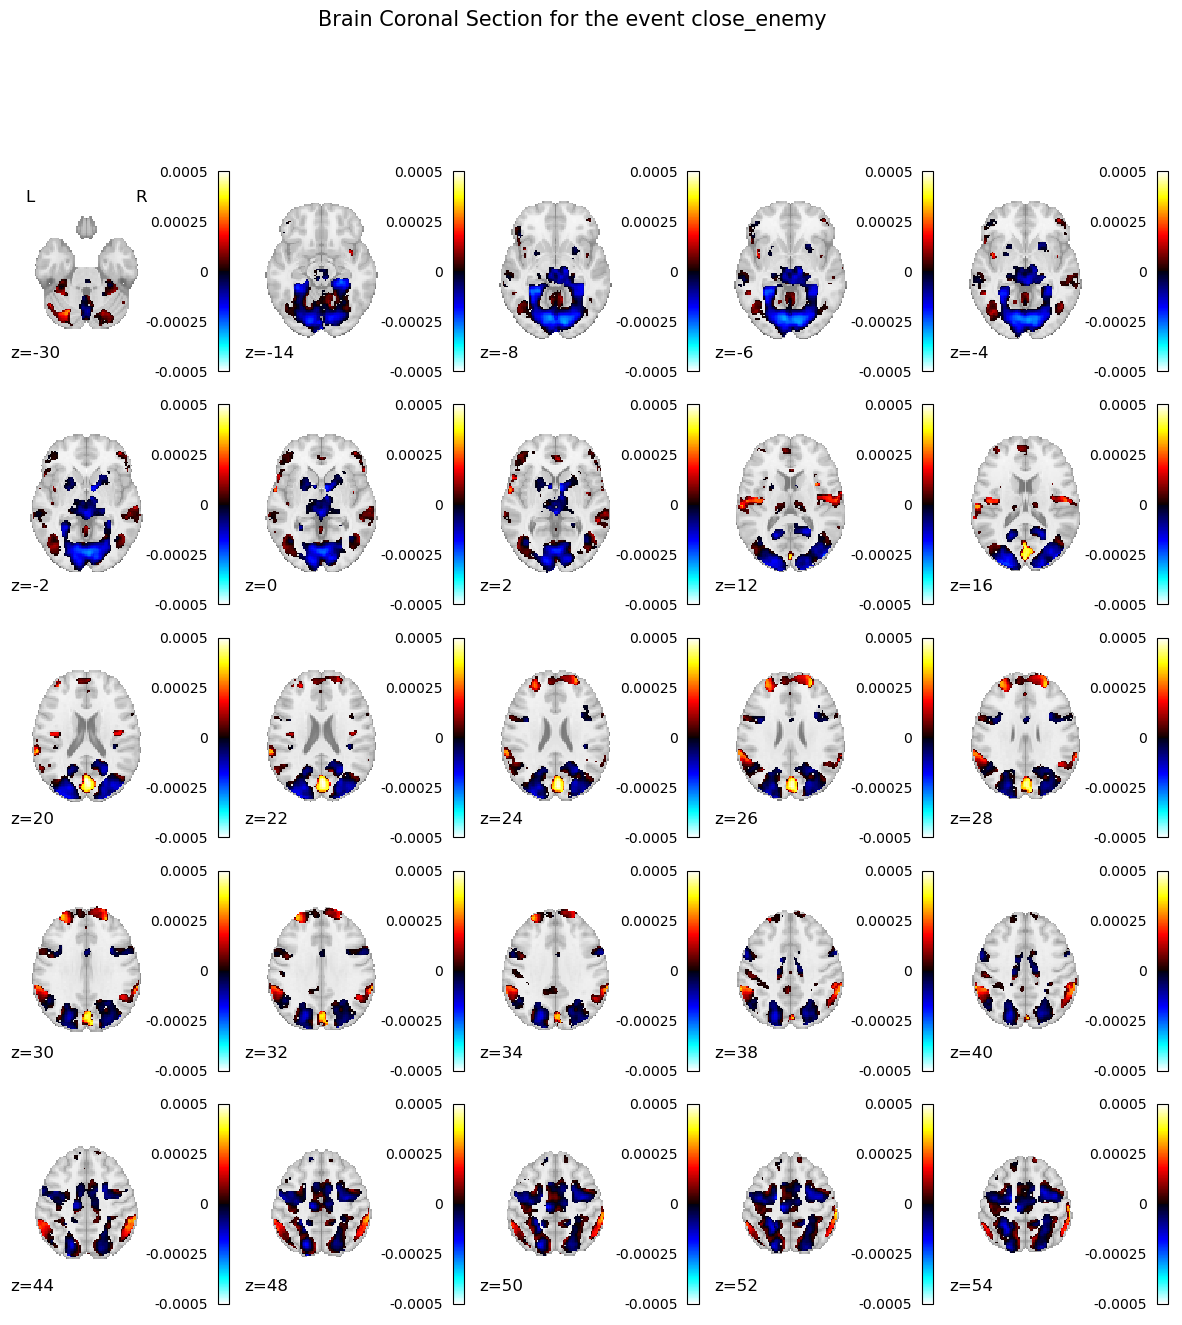

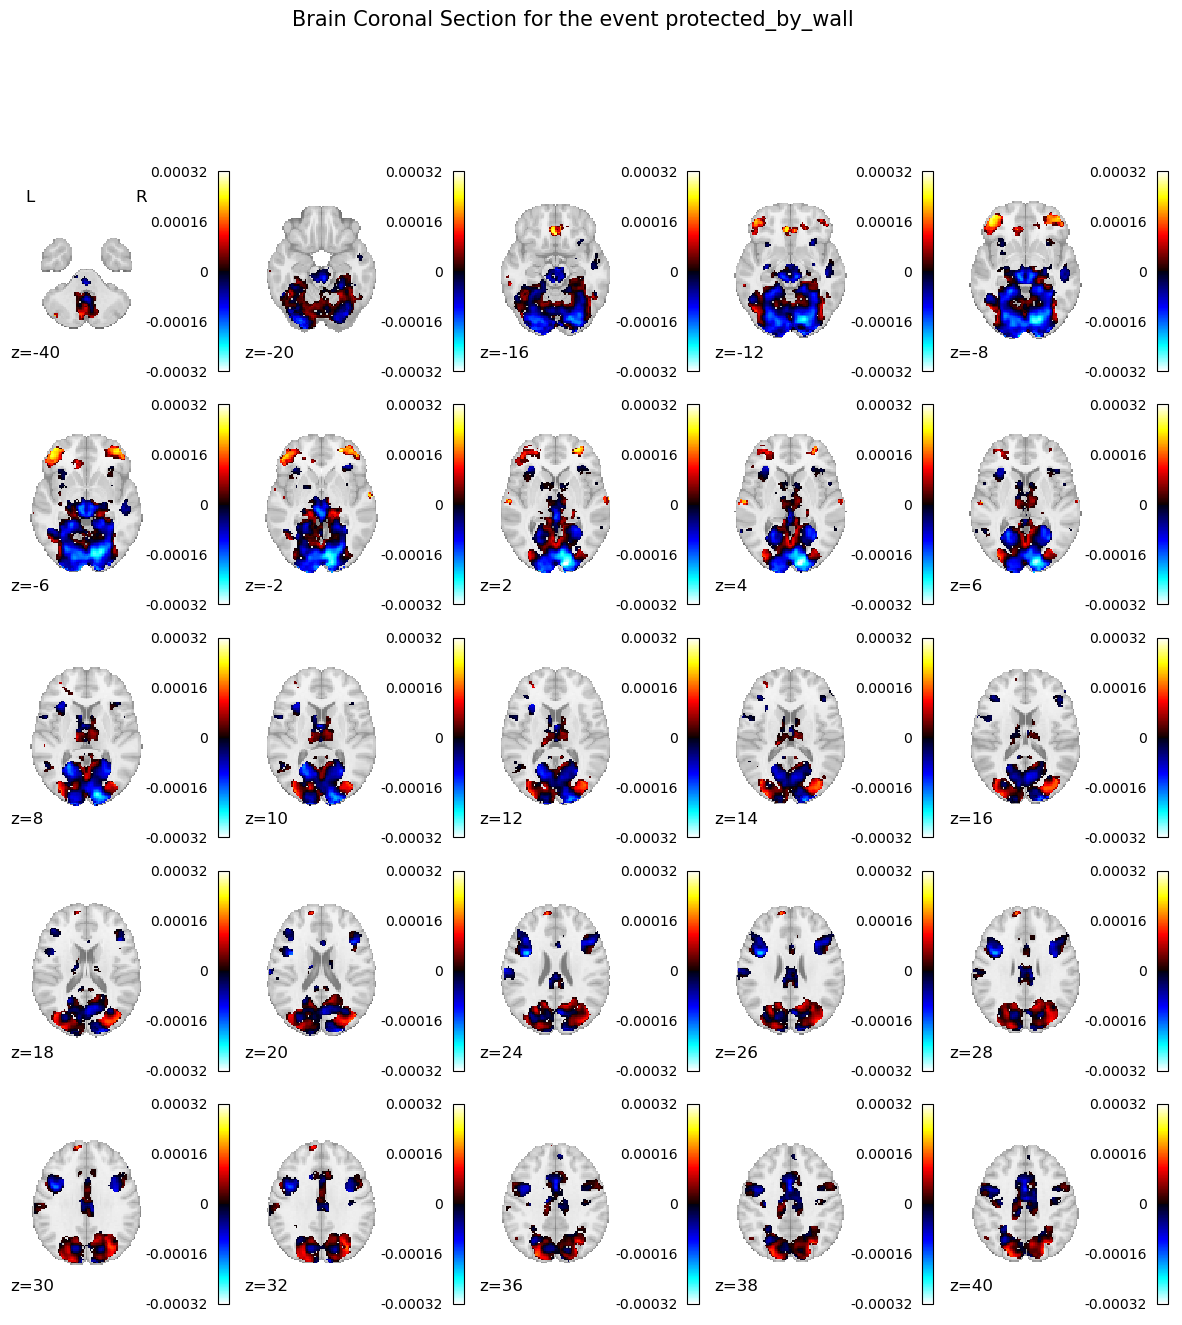

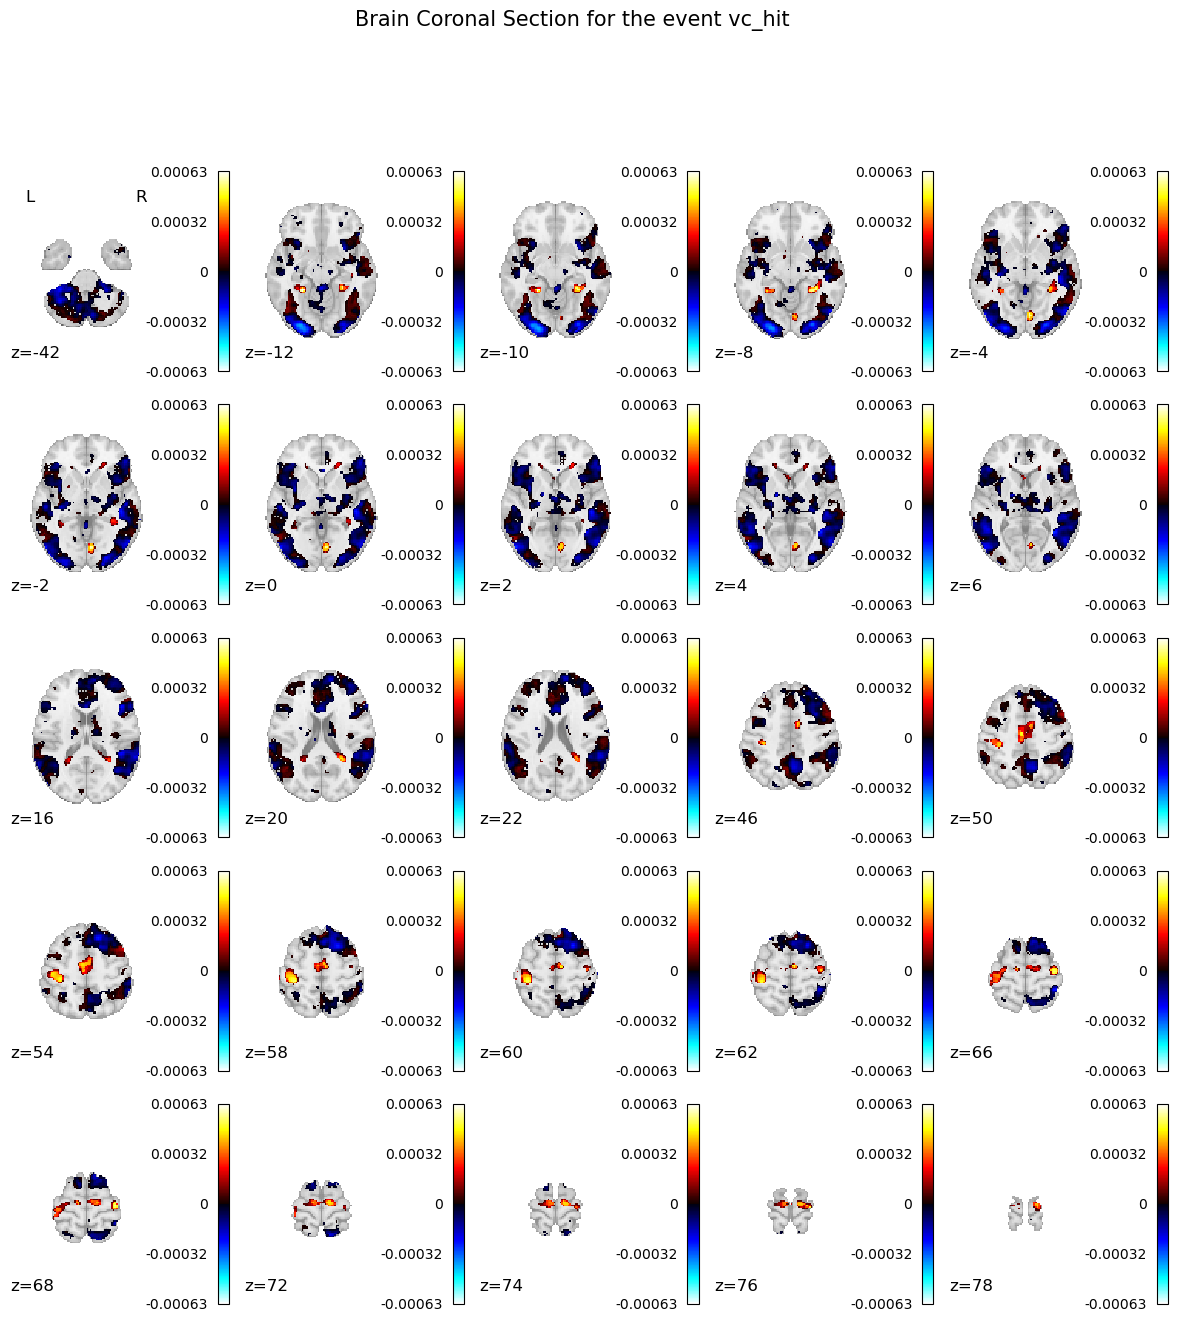

In [38]:
names = ['caught', 'chase', 'checkpoint', 'close_enemy', 'protected_by_wall', 'vc_hit']
for name in names  : 
    plot_z_slices(decoder.coef_img_[name], 5, 5, title=f'Brain Coronal Section for the event {name}', 
                 output_file = f'Decoding_{name}')
    

# SpaceNet 

In [ ]:
## Load Accuracy for each model

graph_net=[]
tv_l1=[]
alphas = [0.1, 1, 10, 100]

for alpha in alphas:
    path = f'logs/spacenet_CV_per_run_graph-net/trained_spacenet_{alpha}.sav'
    graph_net.append( pickle.load(open(path, 'rb'))['accuracies'])
    path_ = f'logs/spacenet_CV_per_run_tv-l1/trained_spacenet_{alpha}.sav'
    tv_l1.append(pickle.load(open(path_, 'rb'))['accuracies'])

Mean accuracy Graphe-Net, for alpha =  0.1 , 0.76 +/- 0.06
Mean accuracy Graphe-Net, for alpha =  0.1 , 0.76 +/- 0.06


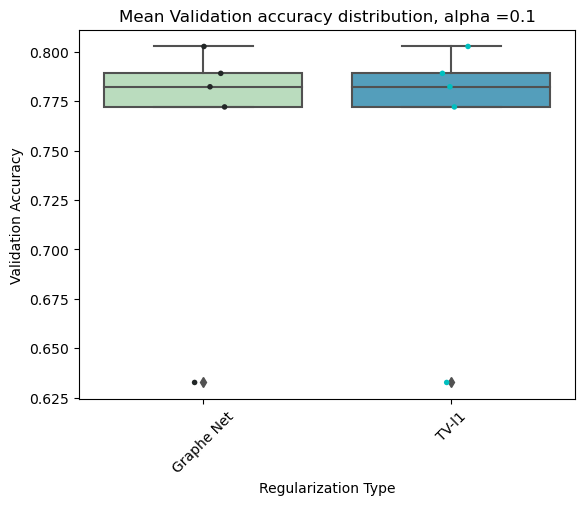

Mean accuracy Graphe-Net, for alpha =  1 , 0.76 +/- 0.06
Mean accuracy Graphe-Net, for alpha =  1 , 0.76 +/- 0.06


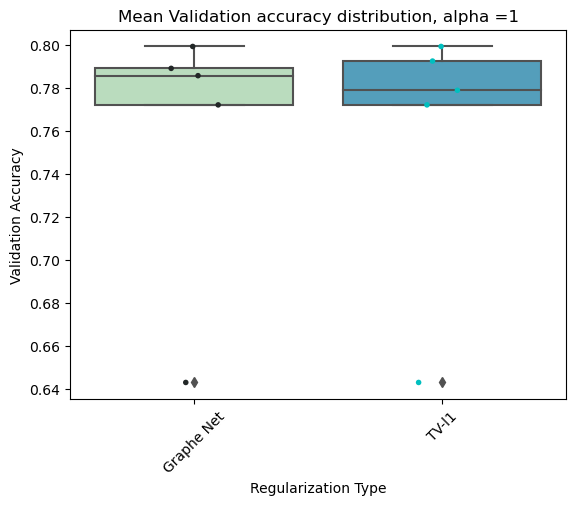

Mean accuracy Graphe-Net, for alpha =  10 , 0.73 +/- 0.06
Mean accuracy Graphe-Net, for alpha =  10 , 0.7 +/- 0.05


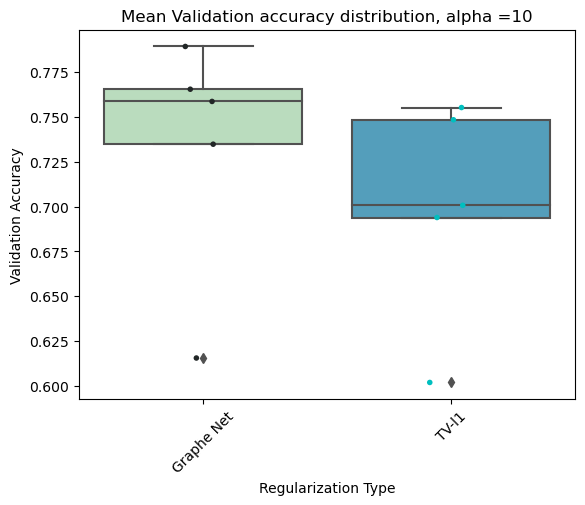

Mean accuracy Graphe-Net, for alpha =  100 , 0.63 +/- 0.02
Mean accuracy Graphe-Net, for alpha =  100 , 0.46 +/- 0.02


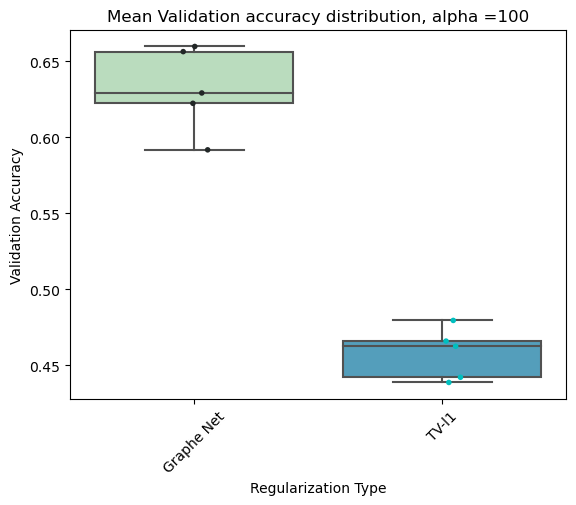

In [54]:
## Comparison bewteen the two Regularization

for i in range(0,4): 
    
    print('Mean accuracy Graphe-Net, for alpha = ', alphas[i], ',' , 
          round(np.mean(graph_net[i]), 2), '+/-',  round(np.std(graph_net[i]), 2))
    
    print('Mean accuracy Graphe-Net, for alpha = ', alphas[i],',',
          round(np.mean(tv_l1[i]), 2), '+/-',  round(np.std(tv_l1[i]), 2))
    
    palette = sns.color_palette("GnBu",  n_colors=2)
    sns.boxplot(data=[graph_net[i], tv_l1[i]], palette= palette).set(
    xlabel='Regularization Type', 
    xticklabels=['Graphe Net', 'TV-l1'],
    ylabel='Validation Accuracy')
    
    
    sns.stripplot(data =[graph_net[i], tv_l1[i]], palette='dark:c',size = 4)
    plt.xticks(rotation=45)
    plt.title ('Mean Validation accuracy distribution, alpha ={}'.format(alphas[i]))
    plt.show()

In [58]:
## Load Models
path_graph = 'logs/spacenet_CV_per_run_graph-net/trained_spacenet_1.sav'
graph=pickle.load(open(path_graph, 'rb'))

path_tv_l1 = 'logs/spacenet_CV_per_run_tv-l1/trained_spacenet_1.sav'
tv_l1 = pickle.load(open(path_tv_l1, 'rb'))

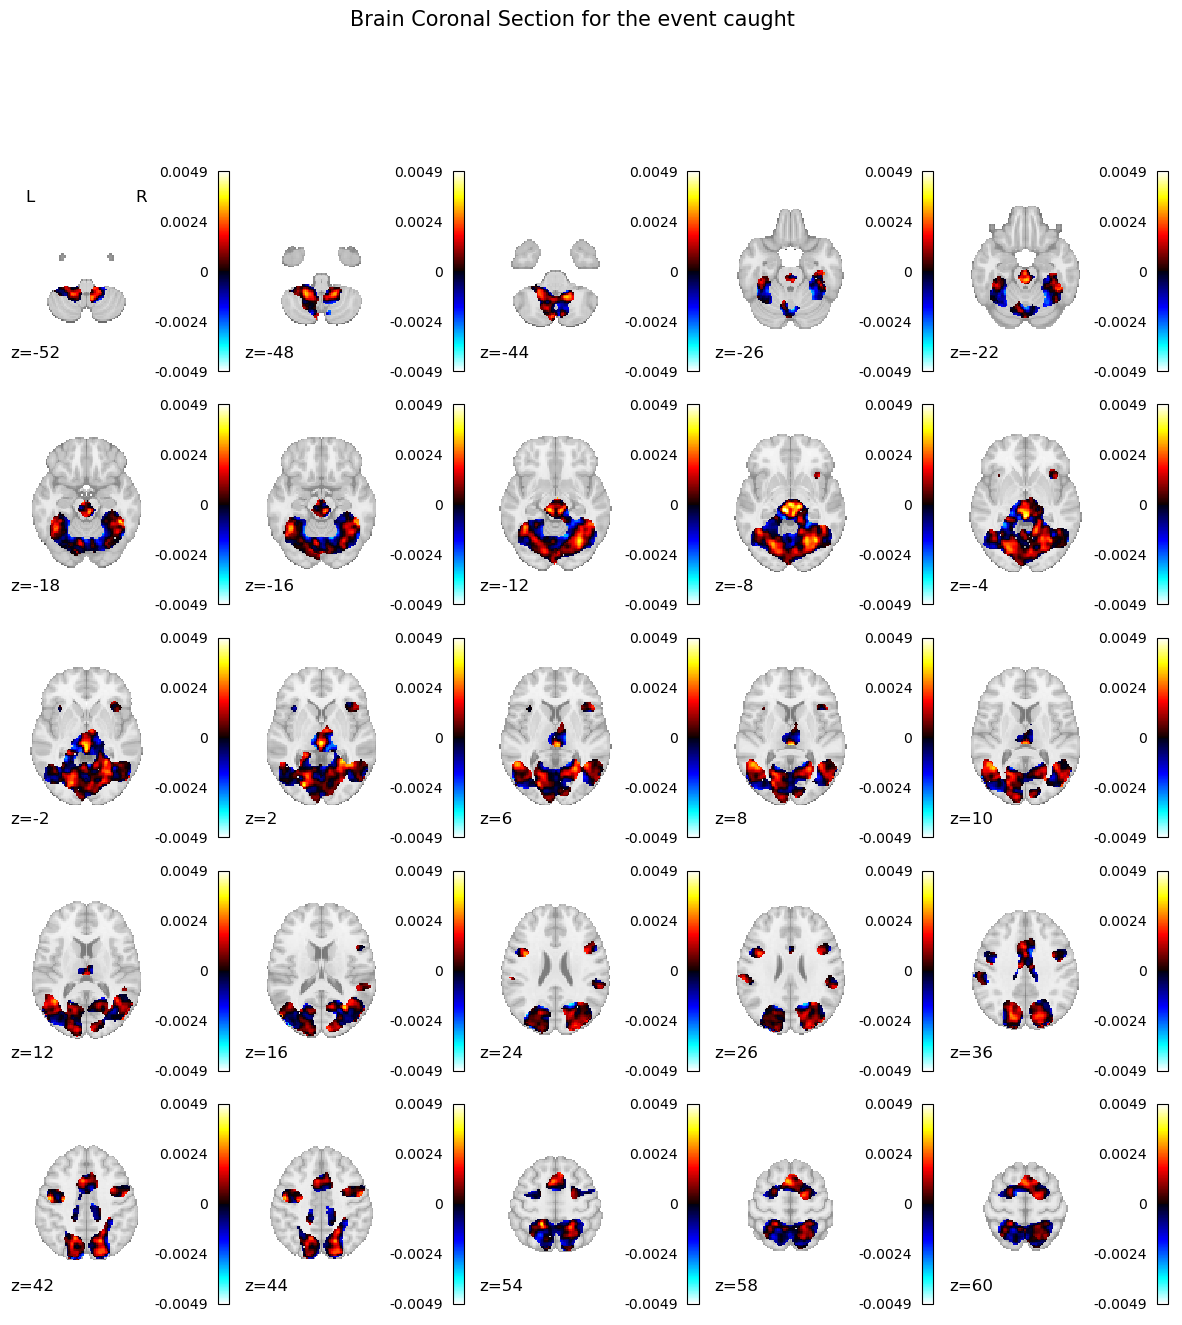

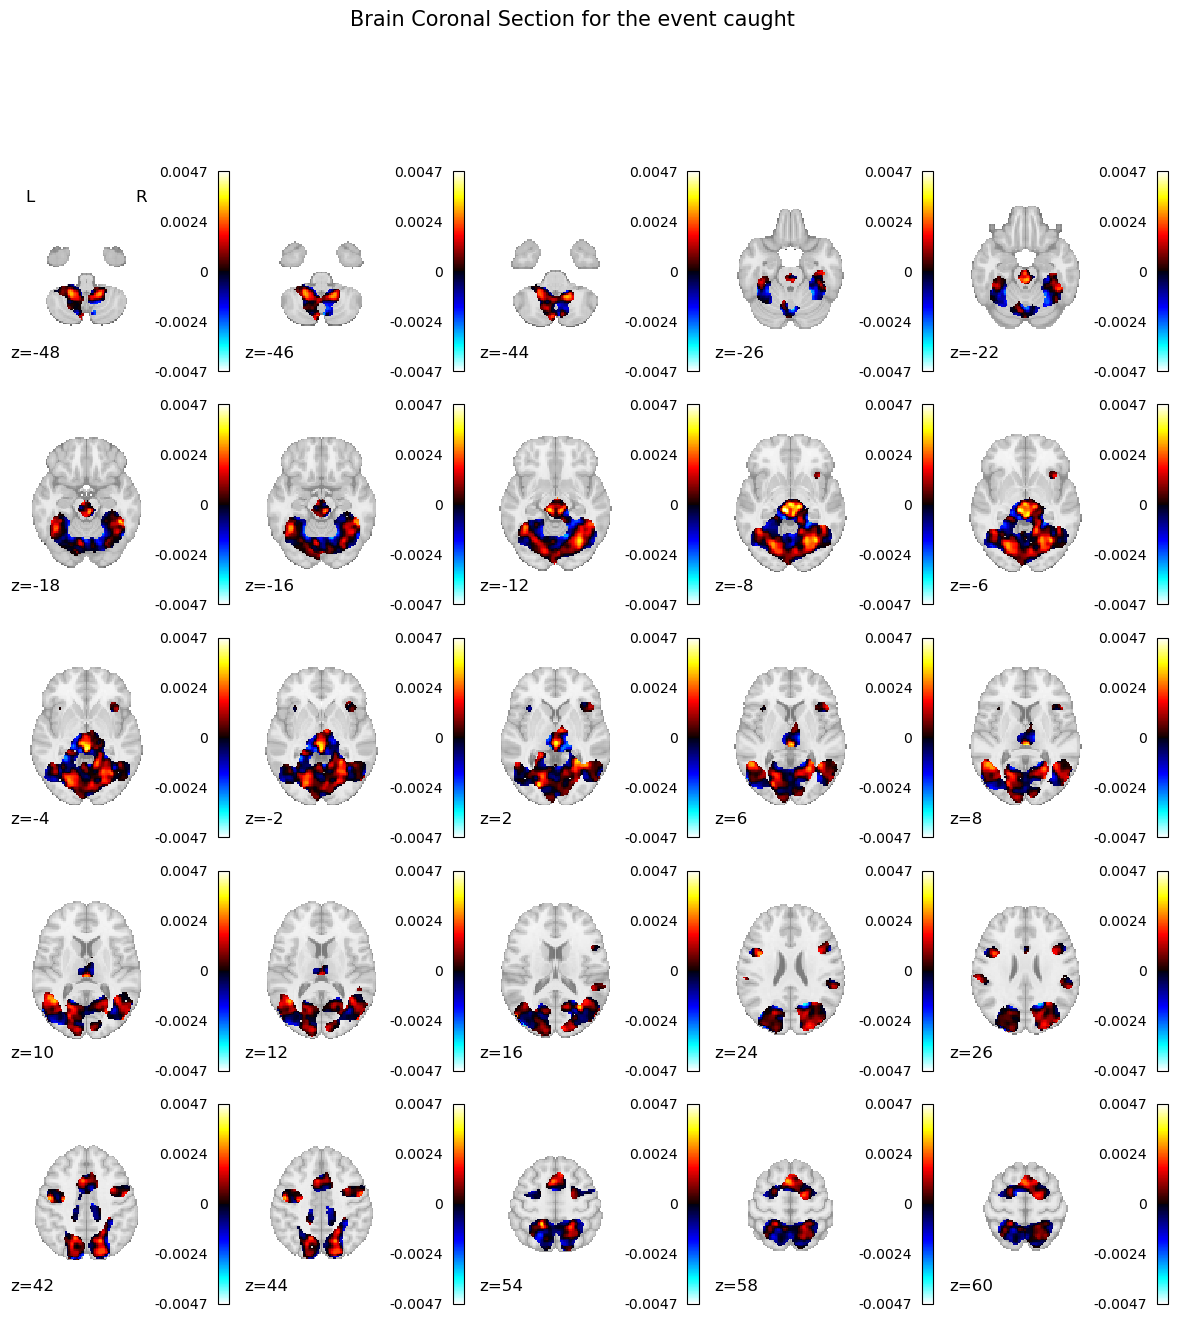

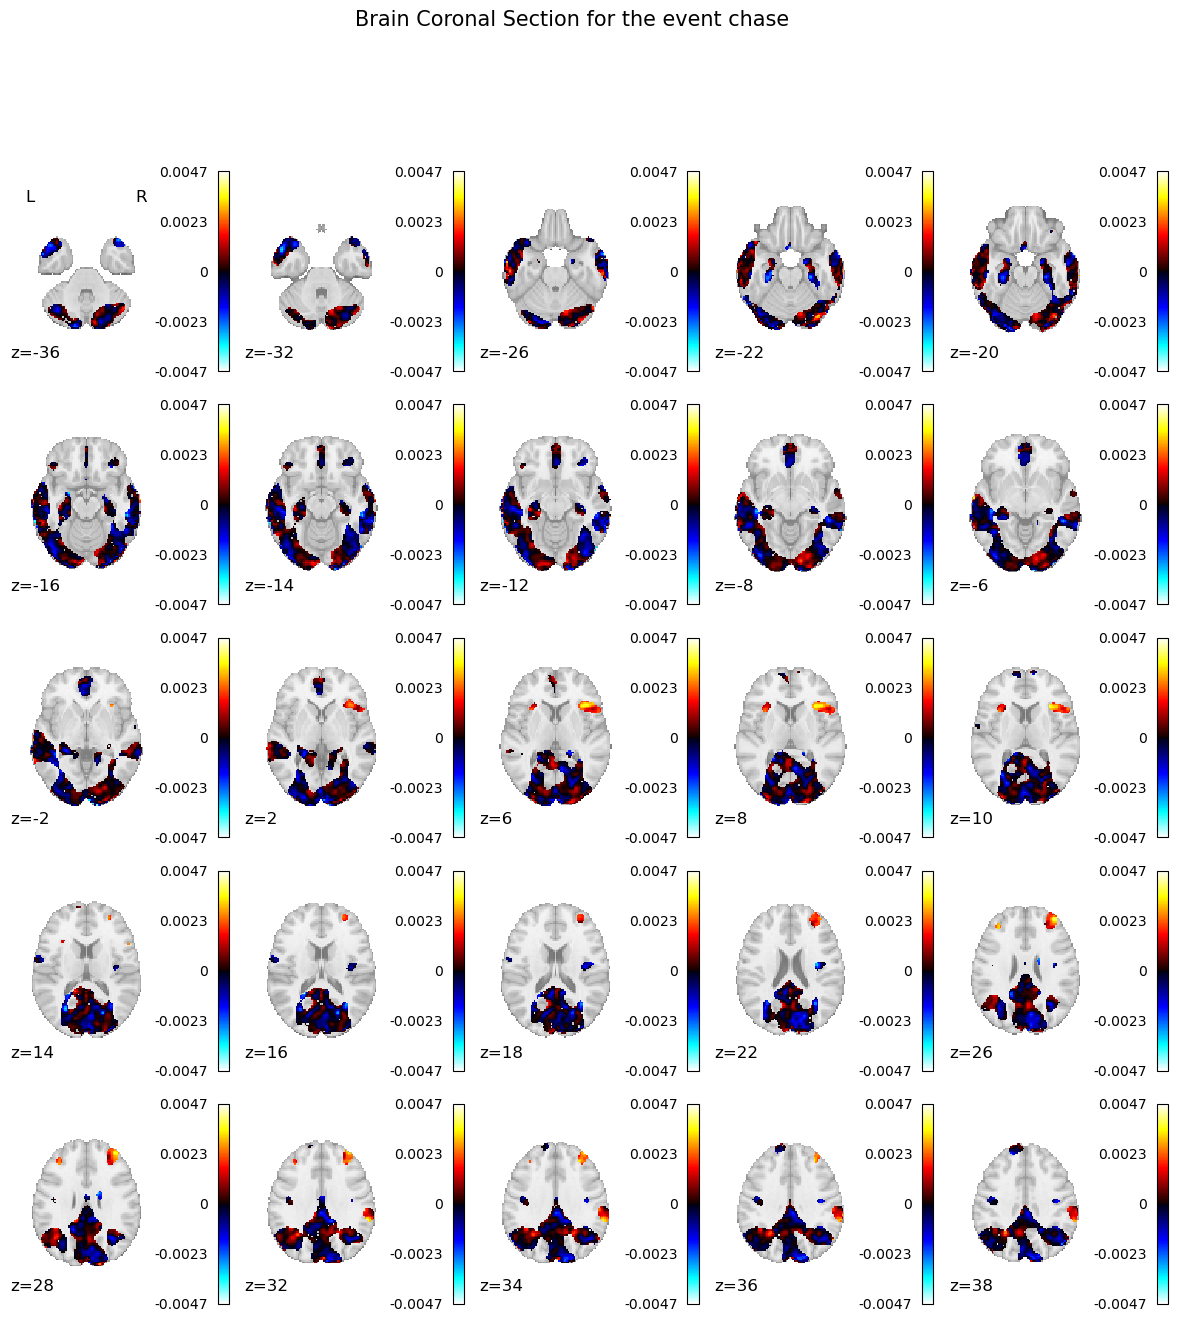

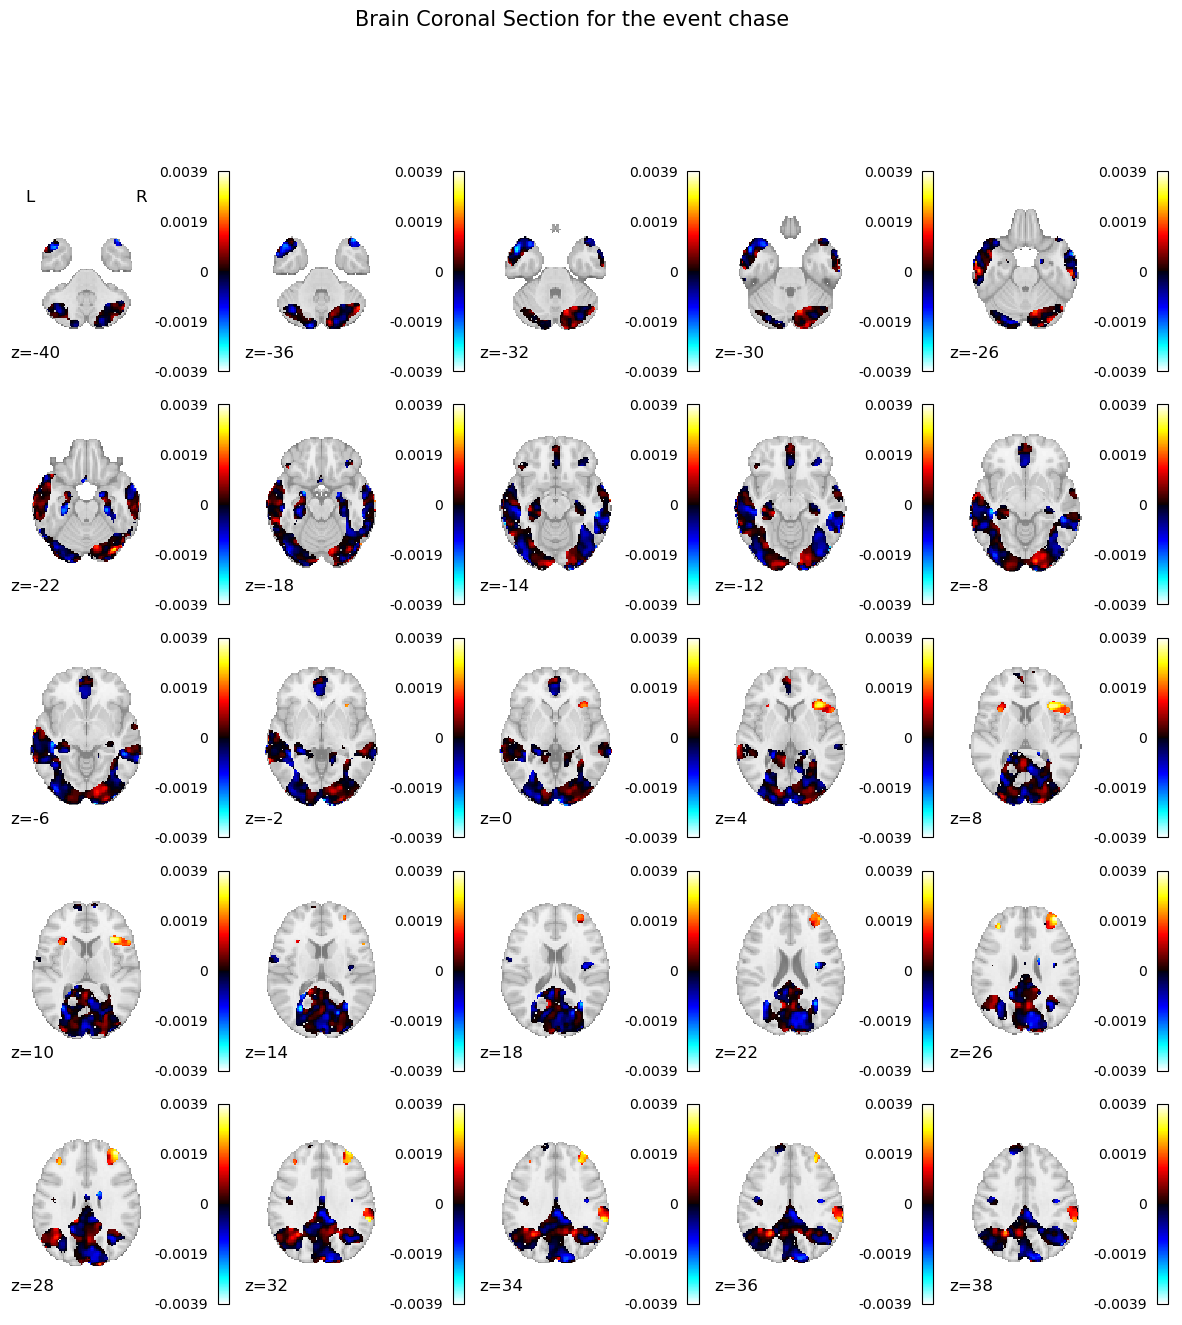

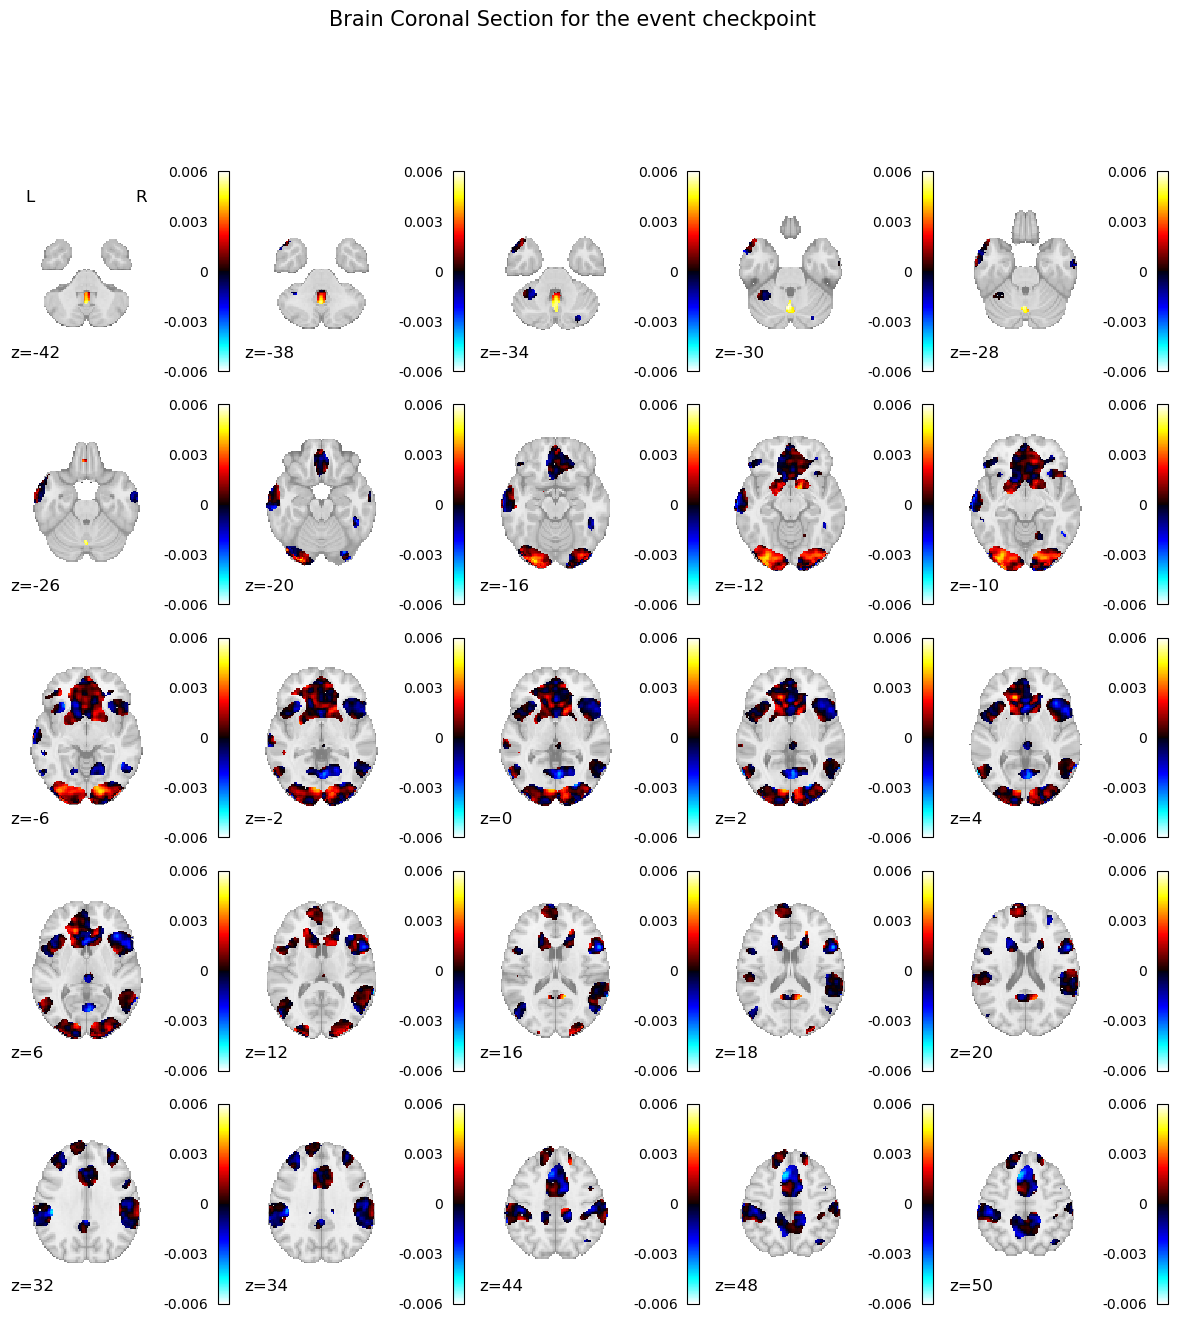

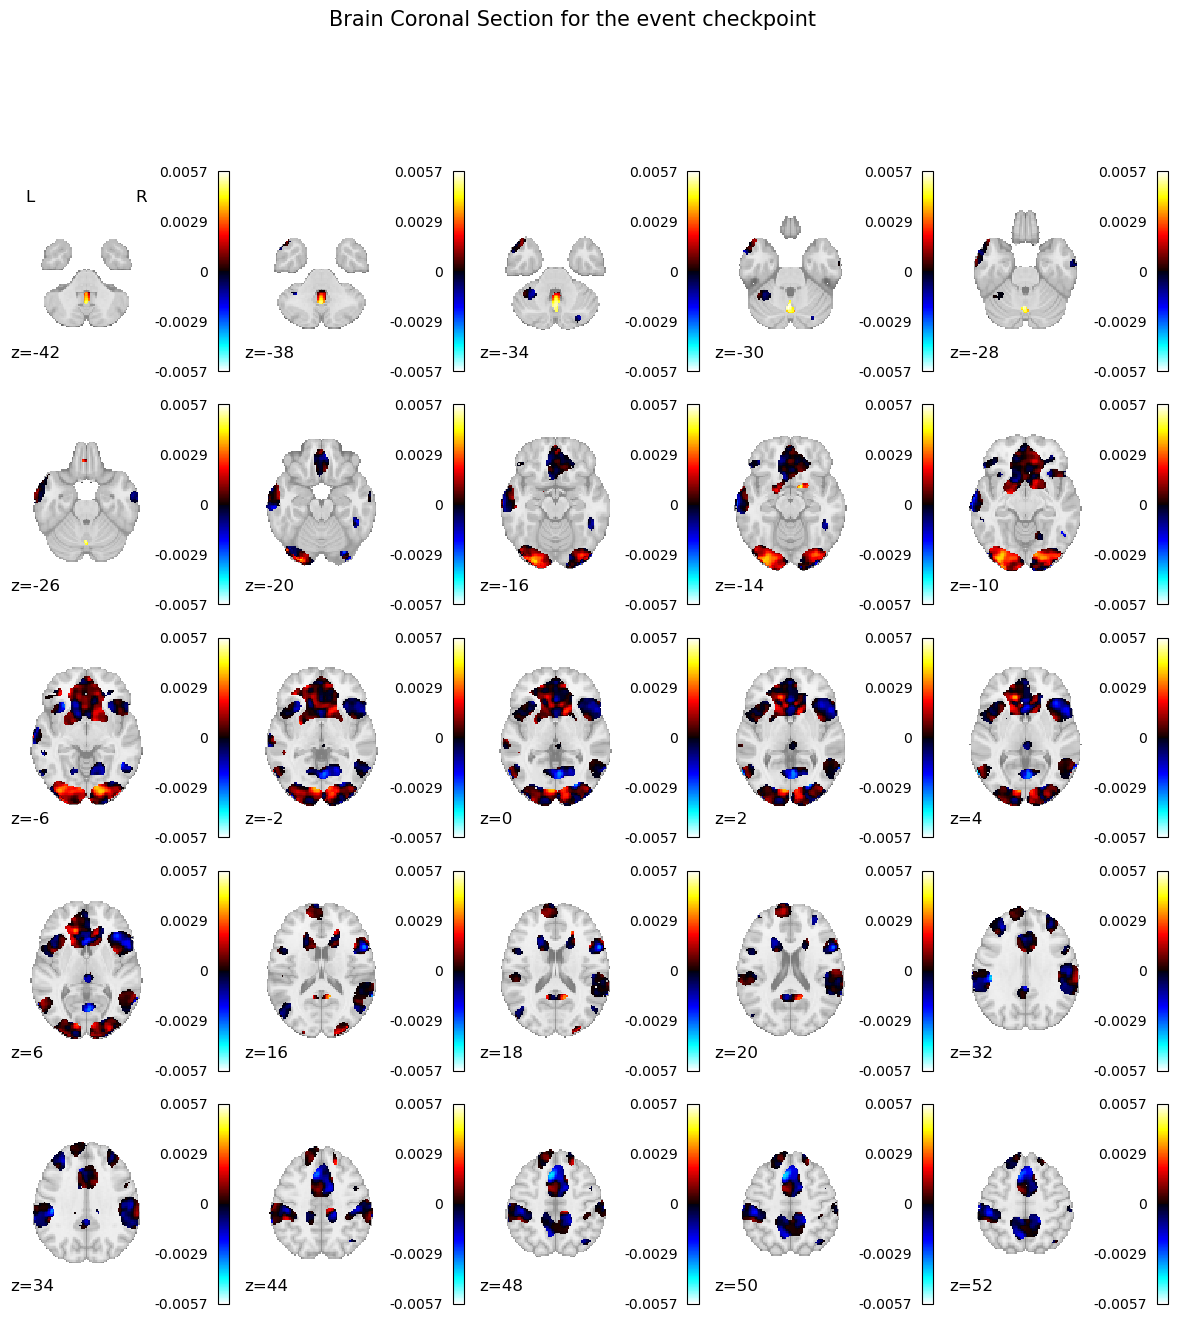

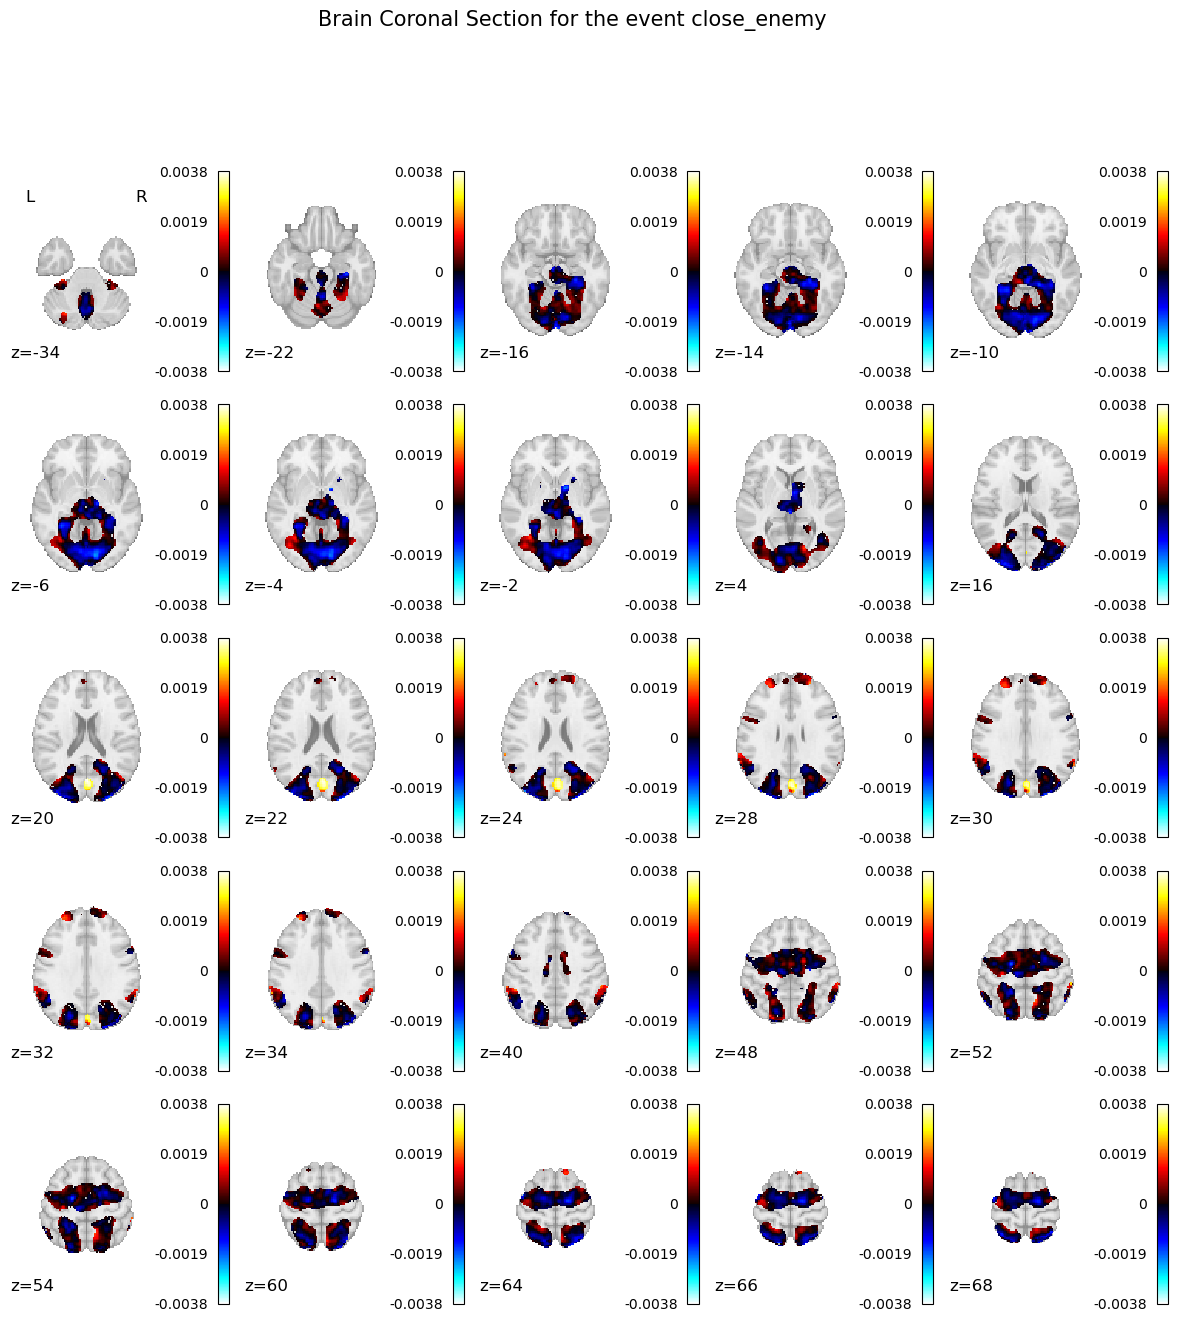

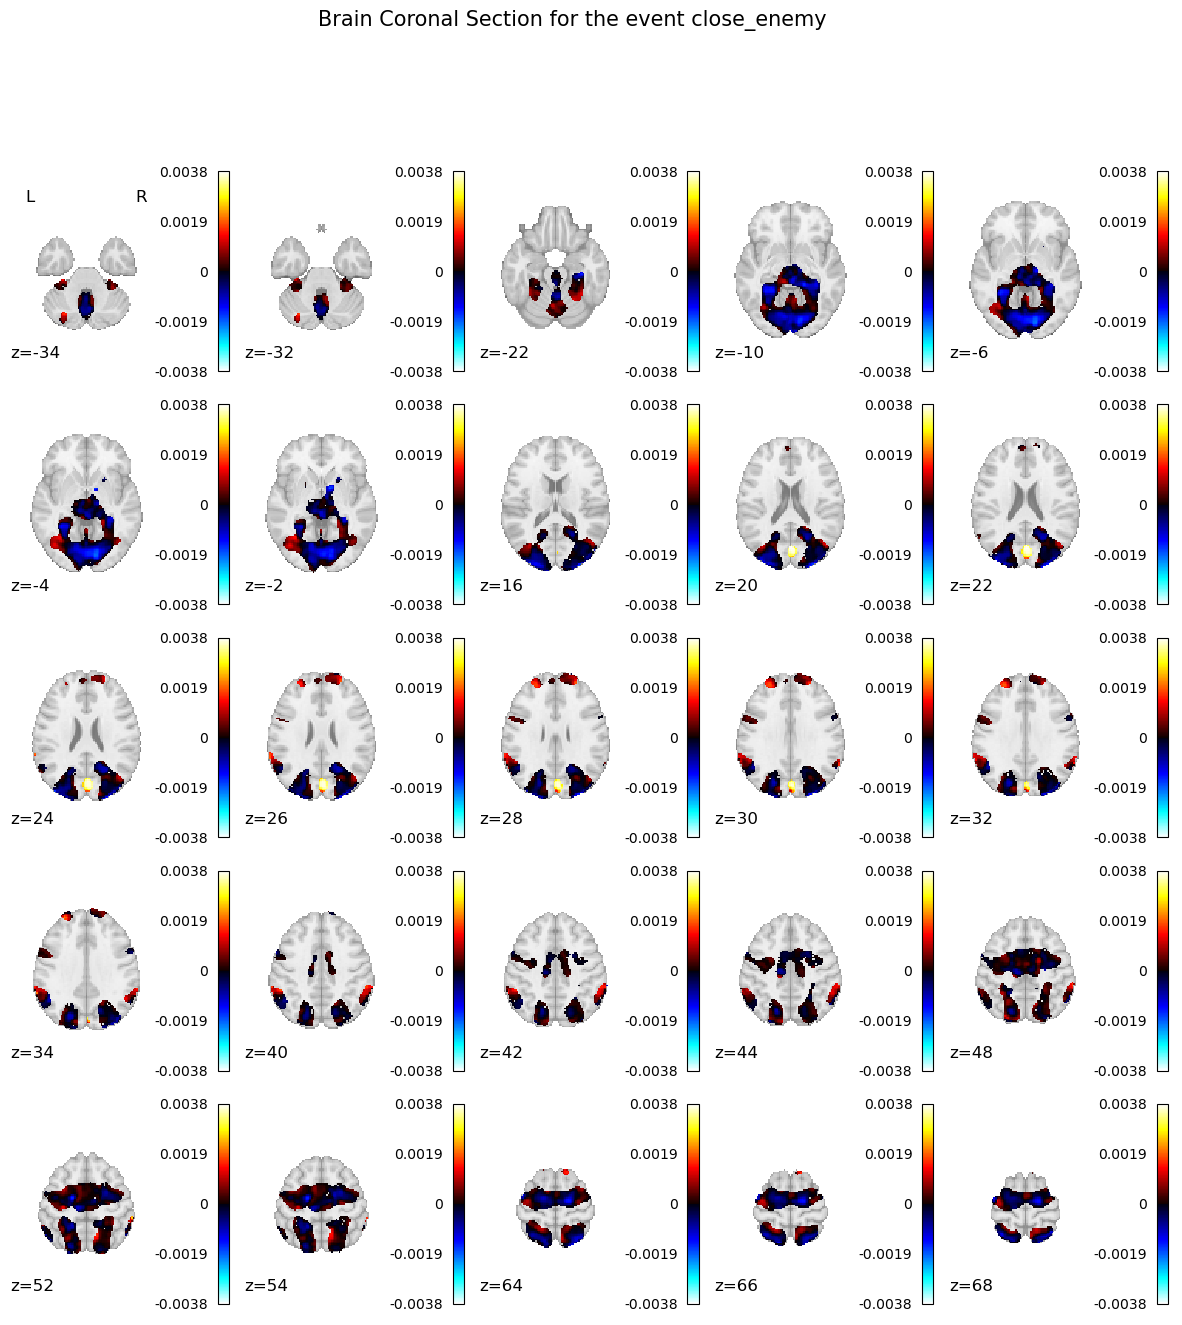

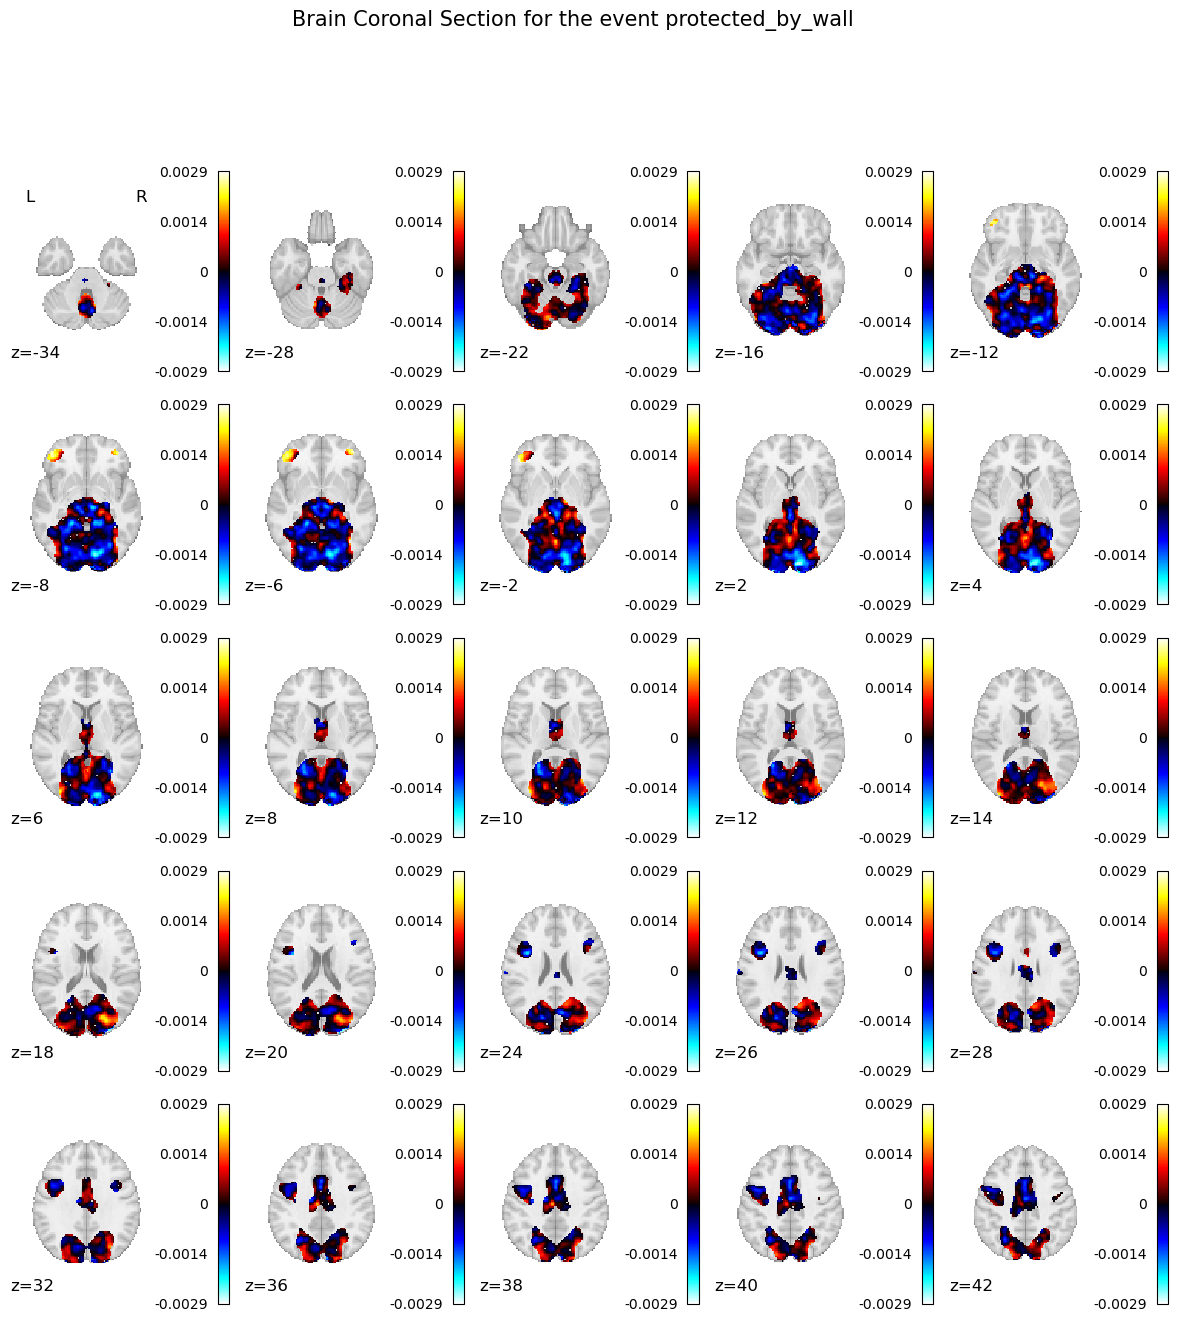

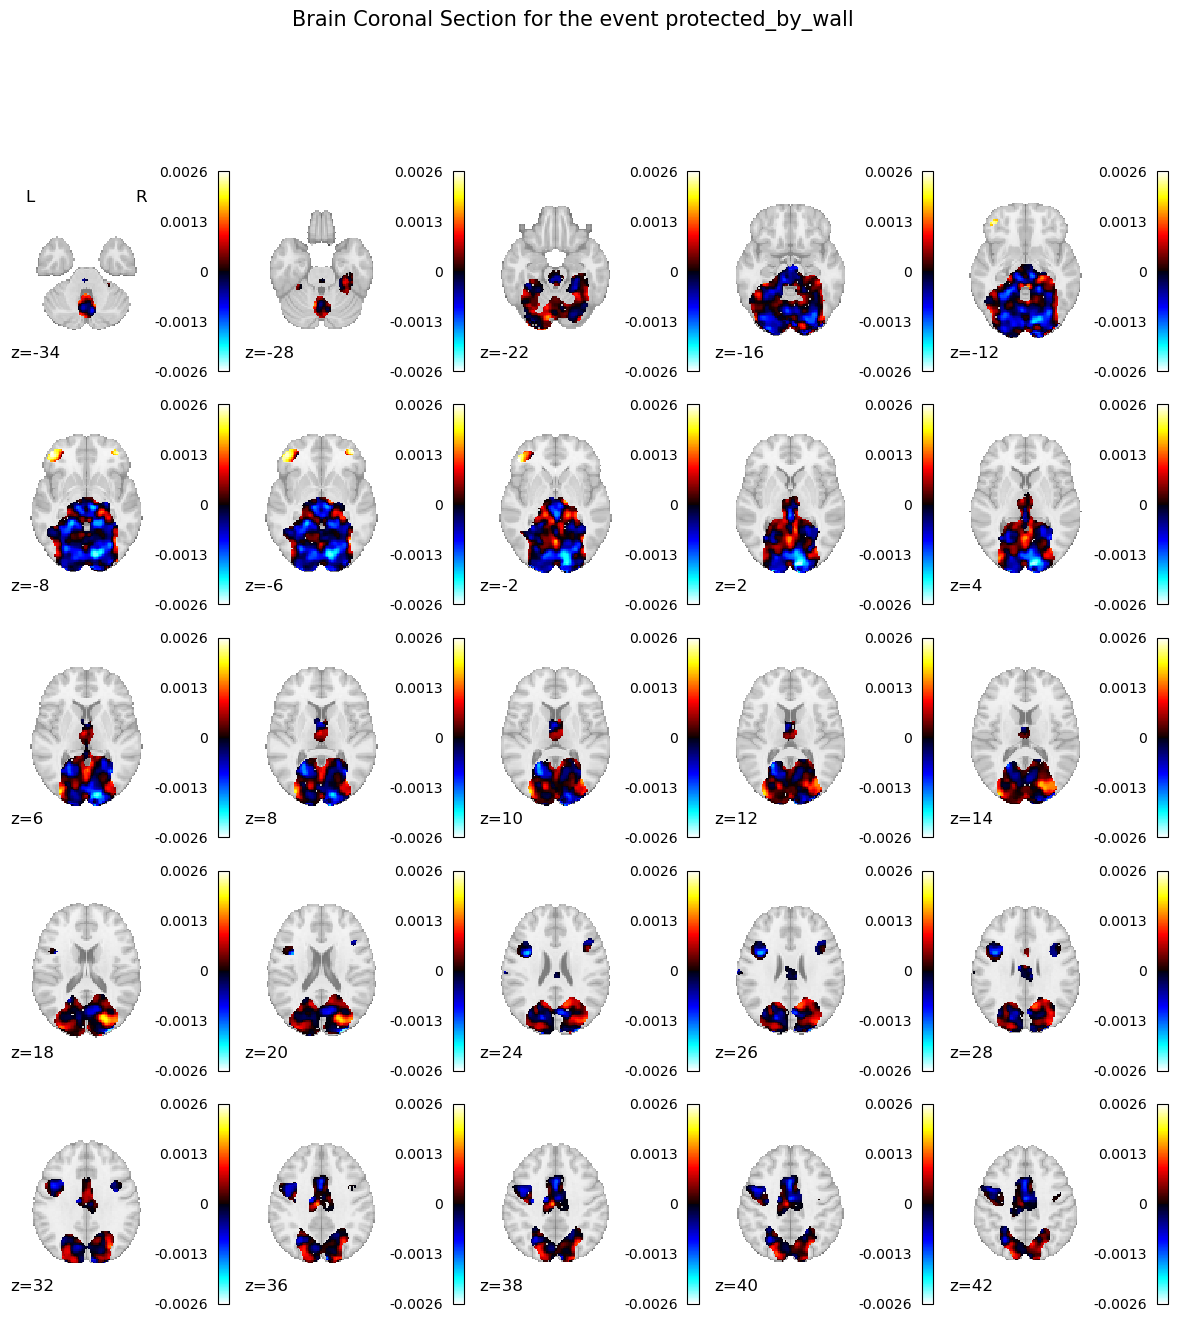

In [59]:
## Get brain images
names= ['caught', 'chase', 'checkpoint', 'close_enemy', 'protected_by_wall', 'vc_hit']
for i in range(0,5)  :
    plot_z_slices(graph['trained_decoder'].coef_img_.slicer[...,i], 5, 5,
                 title = f'Brain Coronal Section for the event {names[i]}', 
                 output_file = f'GraphNet_{names[i]}')
    
    plot_z_slices(tv_l1['trained_decoder'].coef_img_.slicer[...,i], 5, 5,
                 title = f'Brain Coronal Section for the event {names[i]}', 
                 output_file = f'TV_L1_{names[i]}')
    
